<a href="https://colab.research.google.com/github/adenugroho/Penugasan-RPL/blob/main/Praktikum7_RPL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os

import numpy as np

import pandas as pd

from matplotlib import pyplot as plt
%matplotlib inline

import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Kuliah 23/Semester 3/Machine Learning/loans.csv',index_col = 'client_id')

In [ ]:
df.head()

,loan_type,loan_amount,repaid,loan_id,loan_start,loan_end,rate
client_id,,,,,,,
46109,home,13672,0,10243,2002-04-16,2003-12-20,2.15
46109,credit,9794,0,10984,2003-10-21,2005-07-17,1.25
46109,home,12734,1,10990,2006-02-01,2007-07-05,0.68
46109,cash,12518,1,10596,2010-12-08,2013-05-05,1.24
46109,credit,14049,1,11415,2010-07-07,2012-05-21,3.13


In [ ]:
df.shape

(443, 7)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 443 entries, 46109 to 26945
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   loan_type    443 non-null    object 
 1   loan_amount  443 non-null    int64  
 2   repaid       443 non-null    int64  
 3   loan_id      443 non-null    int64  
 4   loan_start   443 non-null    object 
 5   loan_end     443 non-null    object 
 6   rate         443 non-null    float64
dtypes: float64(1), int64(3), object(3)
memory usage: 27.7+ KB


In [ ]:
df.dtypes

loan_type       object
loan_amount      int64
repaid           int64
loan_id          int64
loan_start      object
loan_end        object
rate           float64
dtype: object

In [ ]:
df['loadn_id'] = df['loan_id'].astype('object')

df['repaid'] = df['repaid'].astype('category')

In [ ]:
df['loan_start'] = pd.to_datetime(df['loan_start'], format = '%Y-%m-%d')


df['loan_end'] = pd.to_datetime(df['loan_end'], format = '%Y-%m-%d')

In [ ]:
df.dtypes

loan_type              object
loan_amount             int64
repaid               category
loan_id                 int64
loan_start     datetime64[ns]
loan_end       datetime64[ns]
rate                  float64
loadn_id               object
dtype: object

In [ ]:
df.describe()

,loan_amount,loan_id,rate
count,443.000000,443.000000,443.000000
mean,7982.311512,11017.101580,3.217156
std,4172.891992,581.826222,2.397168
min,559.000000,10009.000000,0.010000
25%,4232.500000,10507.500000,1.220000
50%,8320.000000,11033.000000,2.780000
75%,11739.000000,11526.000000,4.750000
max,14971.000000,11991.000000,12.620000


In [ ]:
df.describe(exclude=[np.number])

,loan_type,repaid,loan_start,loan_end,loadn_id
count,443,443.0,443,443,443.0
unique,4,2.0,430,428,443.0
top,home,1.0,2007-05-16 00:00:00,2008-08-29 00:00:00,10243.0
freq,121,237.0,2,2,1.0
first,NaN,NaN,2000-01-26 00:00:00,2001-08-02 00:00:00,NaN
last,NaN,NaN,2014-11-11 00:00:00,2017-05-07 00:00:00,NaN


In [ ]:
df.isnull().sum()

loan_type      0
loan_amount    0
repaid         0
loan_id        0
loan_start     0
loan_end       0
rate           0
loadn_id       0
dtype: int64

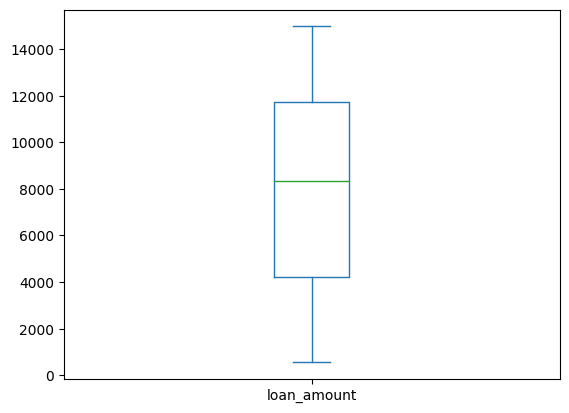

In [ ]:
df['loan_amount'].plot(kind='box')
plt.show()

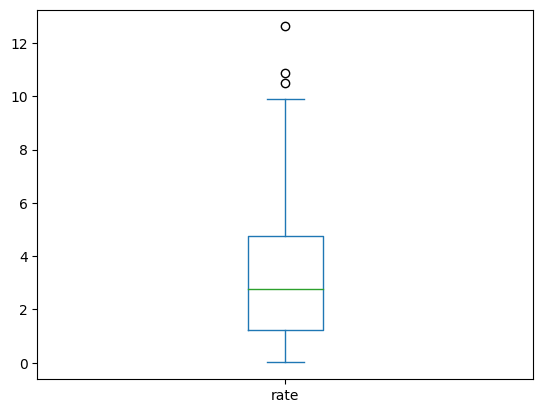

In [ ]:
df['rate'].plot(kind='box')
plt.show()

In [ ]:
df['SQRT_RATE'] = df['rate']**0.5

In [ ]:
df['sqrt_rate'] = np.sqrt(df['rate'])

In [ ]:
df.head()

,loan_type,loan_amount,repaid,loan_id,loan_start,loan_end,rate,loadn_id,SQRT_RATE,sqrt_rate
client_id,,,,,,,,,,
46109,home,13672,0,10243,2002-04-16,2003-12-20,2.15,10243,1.466288,1.466288
46109,credit,9794,0,10984,2003-10-21,2005-07-17,1.25,10984,1.118034,1.118034
46109,home,12734,1,10990,2006-02-01,2007-07-05,0.68,10990,0.824621,0.824621
46109,cash,12518,1,10596,2010-12-08,2013-05-05,1.24,10596,1.113553,1.113553
46109,credit,14049,1,11415,2010-07-07,2012-05-21,3.13,11415,1.769181,1.769181


In [ ]:
print("The skewness of the original data is {}".format(df.rate.skew()))
print("The skewness of the SQRT trasformed data is {}".format(df.SQRT_RATE.skew()))

print('')

print("The kurtosis of the original data is {}".format(df.rate.kurt()))
print("The kurosis of the SQRT transformed data is {}".format(df.SQRT_RATE.kurt()))

The skewness of the original data is 0.884204614329943
The skewness of the SQRT trasformed data is 0.04964154055528862

The kurtosis of the original data is 0.42437165143736433
The kurosis of the SQRT transformed data is -0.6318437642052039


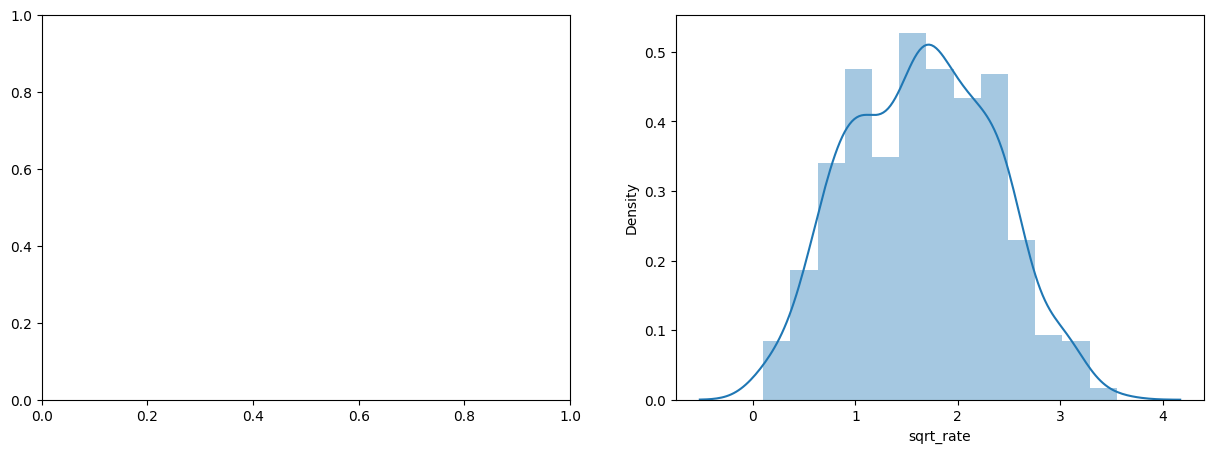

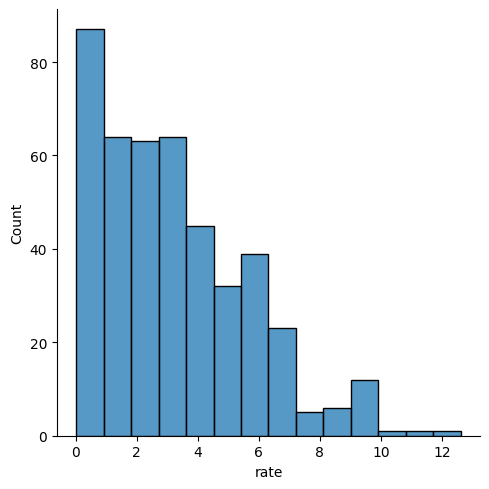

In [ ]:
fig, axes = plt.subplots(1,2,figsize=(15,5))
sns.displot(df['rate'], ax=axes[0])
sns.distplot(df['sqrt_rate'], ax=axes[1])

plt.show()

In [ ]:
df['Log Rate'] = np.log(df['rate'])

In [ ]:
df.head()

,loan_type,loan_amount,repaid,loan_id,loan_start,loan_end,rate,loadn_id,SQRT_RATE,sqrt_rate,Log Rate
client_id,,,,,,,,,,,
46109,home,13672,0,10243,2002-04-16,2003-12-20,2.15,10243,1.466288,1.466288,0.765468
46109,credit,9794,0,10984,2003-10-21,2005-07-17,1.25,10984,1.118034,1.118034,0.223144
46109,home,12734,1,10990,2006-02-01,2007-07-05,0.68,10990,0.824621,0.824621,-0.385662
46109,cash,12518,1,10596,2010-12-08,2013-05-05,1.24,10596,1.113553,1.113553,0.215111
46109,credit,14049,1,11415,2010-07-07,2012-05-21,3.13,11415,1.769181,1.769181,1.141033


In [ ]:
print("The skewness of the original data is {}".format(df.rate.skew()))
print("The skewness of the SQRT trasformed data is {}".format(df.SQRT_RATE.skew()))

print('')

print("The kurtosis of the original data is {}".format(df.rate.kurt()))
print("The kurosis of the SQRT transformed data is {}".format(df.SQRT_RATE.kurt()))

The skewness of the original data is 0.884204614329943
The skewness of the SQRT trasformed data is 0.04964154055528862

The kurtosis of the original data is 0.42437165143736433
The kurosis of the SQRT transformed data is -0.6318437642052039


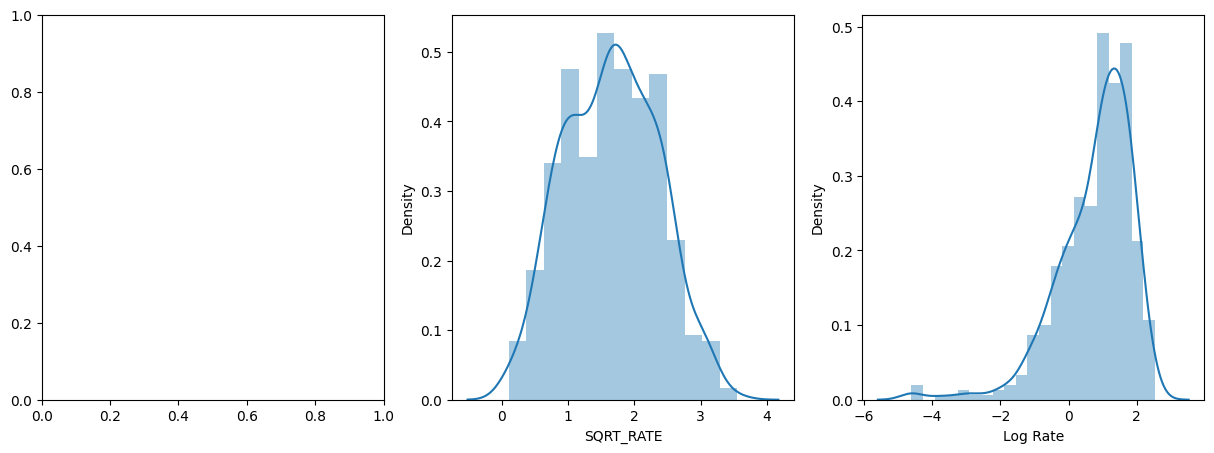

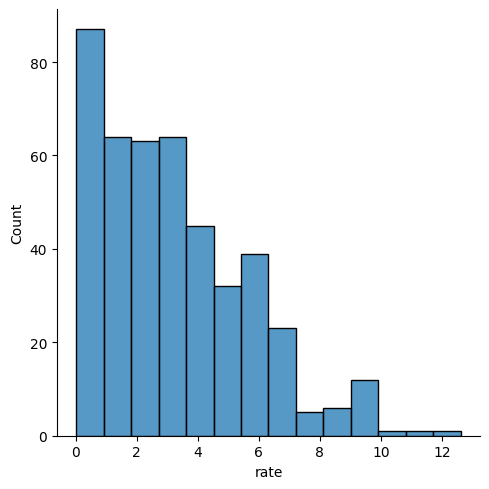

In [ ]:
fig, axes = plt.subplots(1,3,figsize=(15,5))
sns.displot(df['rate'], ax=axes[0])
sns.distplot(df['SQRT_RATE'], ax=axes[1])
sns.distplot(df['Log Rate'], ax=axes[2])

plt.show()

In [ ]:
df['LOG_Rate'] = df['rate'].apply(lambda x:np.log(x))

In [ ]:
df.head()

,loan_type,loan_amount,repaid,loan_id,loan_start,loan_end,rate,loadn_id,SQRT_RATE,sqrt_rate,Log Rate,LOG_Rate
client_id,,,,,,,,,,,,
46109,home,13672,0,10243,2002-04-16,2003-12-20,2.15,10243,1.466288,1.466288,0.765468,0.765468
46109,credit,9794,0,10984,2003-10-21,2005-07-17,1.25,10984,1.118034,1.118034,0.223144,0.223144
46109,home,12734,1,10990,2006-02-01,2007-07-05,0.68,10990,0.824621,0.824621,-0.385662,-0.385662
46109,cash,12518,1,10596,2010-12-08,2013-05-05,1.24,10596,1.113553,1.113553,0.215111,0.215111
46109,credit,14049,1,11415,2010-07-07,2012-05-21,3.13,11415,1.769181,1.769181,1.141033,1.141033


OUTLIERS TREATMENT USING CAPPING APPROACH

In [ ]:
df1 = pd.read_csv('/content/drive/MyDrive/Kuliah 23/Semester 3/Machine Learning/loans.csv',index_col = 'client_id')
df1.head()

,loan_type,loan_amount,repaid,loan_id,loan_start,loan_end,rate
client_id,,,,,,,
46109,home,13672,0,10243,2002-04-16,2003-12-20,2.15
46109,credit,9794,0,10984,2003-10-21,2005-07-17,1.25
46109,home,12734,1,10990,2006-02-01,2007-07-05,0.68
46109,cash,12518,1,10596,2010-12-08,2013-05-05,1.24
46109,credit,14049,1,11415,2010-07-07,2012-05-21,3.13


In [ ]:
df['loan_id'] = df1['loan_id'].astype('object')

df1['repaid'] = df1['repaid'].astype('category')

In [ ]:
df1['loan_start'] = pd.to_datetime(df1['loan_start'], format = '%Y-%m-%d')

df1['loan_end'] = pd.to_datetime(df1['loan_end'], format = '%Y-%m-%d')

In [ ]:
import scipy.stats as stats

In [ ]:
df1['ZR'] = stats.zscore(df['rate'])

In [ ]:
df1.head()

,loan_type,loan_amount,repaid,loan_id,loan_start,loan_end,rate,ZR
client_id,,,,,,,,
46109,home,13672,0,10243,2002-04-16,2003-12-20,2.15,-0.445677
46109,credit,9794,0,10984,2003-10-21,2005-07-17,1.25,-0.821544
46109,home,12734,1,10990,2006-02-01,2007-07-05,0.68,-1.059594
46109,cash,12518,1,10596,2010-12-08,2013-05-05,1.24,-0.825721
46109,credit,14049,1,11415,2010-07-07,2012-05-21,3.13,-0.036399


In [ ]:
df1[(df1['ZR']<-3) | (df1['ZR']>3)]

,loan_type,loan_amount,repaid,loan_id,loan_start,loan_end,rate,ZR
client_id,,,,,,,,
41480,credit,2947,1,10302,2005-11-10,2008-03-16,10.49,3.037362
48177,other,6318,0,10224,2003-02-02,2005-05-08,10.89,3.204415
49624,home,8133,1,10312,2009-03-14,2011-03-21,12.62,3.926916


In [ ]:
df1[(df1['ZR']<-3) | (df1['ZR']>3)].shape[0]

3

In [ ]:
df2 = df1[(df1['ZR']>-3) & (df1['ZR']<3)].reset_index()
df2.head()

,client_id,loan_type,loan_amount,repaid,loan_id,loan_start,loan_end,rate,ZR
0,46109,home,13672,0,10243,2002-04-16,2003-12-20,2.15,-0.445677
1,46109,credit,9794,0,10984,2003-10-21,2005-07-17,1.25,-0.821544
2,46109,home,12734,1,10990,2006-02-01,2007-07-05,0.68,-1.059594
3,46109,cash,12518,1,10596,2010-12-08,2013-05-05,1.24,-0.825721
4,46109,credit,14049,1,11415,2010-07-07,2012-05-21,3.13,-0.036399


In [ ]:
df1.shape

(443, 8)

In [ ]:
df2.shape

(440, 9)

In [ ]:
df3 = df2.copy()

In [ ]:
df3.drop(columns = ['ZR'], inplace=True)
df3.head()

,client_id,loan_type,loan_amount,repaid,loan_id,loan_start,loan_end,rate
0,46109,home,13672,0,10243,2002-04-16,2003-12-20,2.15
1,46109,credit,9794,0,10984,2003-10-21,2005-07-17,1.25
2,46109,home,12734,1,10990,2006-02-01,2007-07-05,0.68
3,46109,cash,12518,1,10596,2010-12-08,2013-05-05,1.24
4,46109,credit,14049,1,11415,2010-07-07,2012-05-21,3.13


IQR Method to treat Outliers

In [ ]:
Q1 = df3.rate.quantile(0.25)
Q2 = df3.rate.quantile(0.25)
Q3 = df3.rate.quantile(0.25)

IQR = Q3 - Q1

LC = Q1 - (1.5*IQR)

UC = Q3 + (1.5*IQR)

display(LC)
display(UC)

1.2175

1.2175

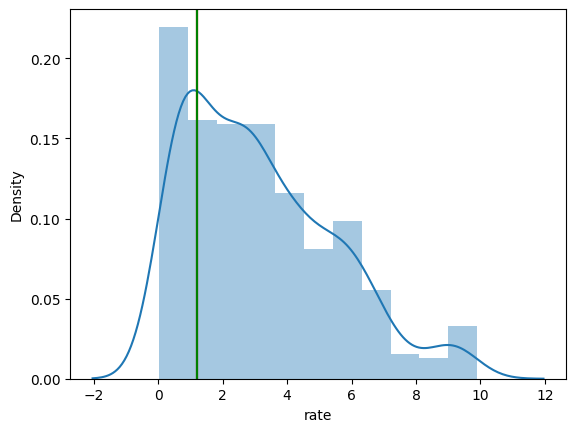

In [ ]:
sns.distplot(df3.rate)
plt.axvline(UC, color='r')
plt.axvline(LC, color='r')
plt.axvline(Q1, color='g')
plt.axvline(Q3, color='g')
plt.show()

In [ ]:
df3[(df3.rate<LC) | (df3.rate>UC).reset_index(drop=True)]

,client_id,loan_type,loan_amount,repaid,loan_id,loan_start,loan_end,rate
0,46109,home,13672,0,10243,2002-04-16,2003-12-20,2.15
1,46109,credit,9794,0,10984,2003-10-21,2005-07-17,1.25
2,46109,home,12734,1,10990,2006-02-01,2007-07-05,0.68
3,46109,cash,12518,1,10596,2010-12-08,2013-05-05,1.24
4,46109,credit,14049,1,11415,2010-07-07,2012-05-21,3.13
...,...,...,...,...,...,...,...,...
435,26945,other,12963,0,10330,2001-11-26,2004-06-11,2.46
436,26945,credit,1728,1,10248,2004-01-27,2005-06-21,5.27
437,26945,other,9329,0,10154,2001-12-17,2004-07-22,5.65
438,26945,home,4197,0,10333,2003-10-16,2005-07-10,4.50


In [ ]:
df3[(df3.rate<LC) | (df3.rate>UC)].shape[0]

440

In [ ]:
df4 = df3[(df3.rate>LC) & (df3.rate<UC)]
df4.head()

,client_id,loan_type,loan_amount,repaid,loan_id,loan_start,loan_end,rate


In [ ]:
df3.shape

(440, 8)

In [ ]:
df4.shape

(0, 8)

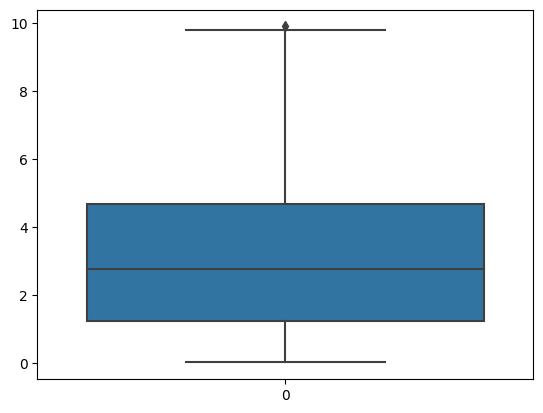

In [ ]:
sns.boxplot(df2.rate)
plt.show()

In [ ]:
sns.boxplot(df4.rate)
plt.show()

KeyError: ignored

9. Scaling the Numerical Features

In [ ]:
avg_rate = df3['rate'].mean()
avg_rate

3.161818181818182

In [ ]:
std_rate = df3['rate'].std()
std_rate

2.3079474188229154

In [ ]:
df3.head()

,client_id,loan_type,loan_amount,repaid,loan_id,loan_start,loan_end,rate
0,46109,home,13672,0,10243,2002-04-16,2003-12-20,2.15
1,46109,credit,9794,0,10984,2003-10-21,2005-07-17,1.25
2,46109,home,12734,1,10990,2006-02-01,2007-07-05,0.68
3,46109,cash,12518,1,10596,2010-12-08,2013-05-05,1.24
4,46109,credit,14049,1,11415,2010-07-07,2012-05-21,3.13


In [ ]:
df3['Z_Score_Rate'] = (df3['rate'] - avg_rate)/std_rate

In [ ]:
df3.head()

,client_id,loan_type,loan_amount,repaid,loan_id,loan_start,loan_end,rate,Z_Score_Rate
0,46109,home,13672,0,10243,2002-04-16,2003-12-20,2.15,-0.438406
1,46109,credit,9794,0,10984,2003-10-21,2005-07-17,1.25,-0.828363
2,46109,home,12734,1,10990,2006-02-01,2007-07-05,0.68,-1.075336
3,46109,cash,12518,1,10596,2010-12-08,2013-05-05,1.24,-0.832696
4,46109,credit,14049,1,11415,2010-07-07,2012-05-21,3.13,-0.013786


In [ ]:
print ("".format(df3.rate.skew()))
print ("".format(df3.rate.kurt()))
print("")
print (format(df3.Z_Score_Rate.skew()))
print (format(df3.Z_Score_Rate.kurt()))




0.7594062707815691
-0.05964248048746823


In [ ]:
avg_LA=df3['loan_amount'].mean()
avg_LA

7997.195454545455

In [ ]:
std_LA=df3['loan_amount'].std()
std_LA

4179.435966237437

In [ ]:
df3['Z_Score_LA'] = (df3['loan_amount'] - avg_LA)/std_LA

In [ ]:
df3.head()

,client_id,loan_type,loan_amount,repaid,loan_id,loan_start,loan_end,rate,Z_Score_Rate,Z_Score_LA
0,46109,home,13672,0,10243,2002-04-16,2003-12-20,2.15,1.357792,1.357792
1,46109,credit,9794,0,10984,2003-10-21,2005-07-17,1.25,0.429916,0.429916
2,46109,home,12734,1,10990,2006-02-01,2007-07-05,0.68,1.133360,1.133360
3,46109,cash,12518,1,10596,2010-12-08,2013-05-05,1.24,1.081678,1.081678
4,46109,credit,14049,1,11415,2010-07-07,2012-05-21,3.13,1.447996,1.447996


In [ ]:
print ("".format(df3.loan_amount.skew()))
print ("".format(df3.loan_amount.kurt()))
print("")
print (format(df3.Z_Score_LA.skew()))
print (format(df3.Z_Score_LA.kurt()))




-0.04678765472024289
-1.2354309429278456


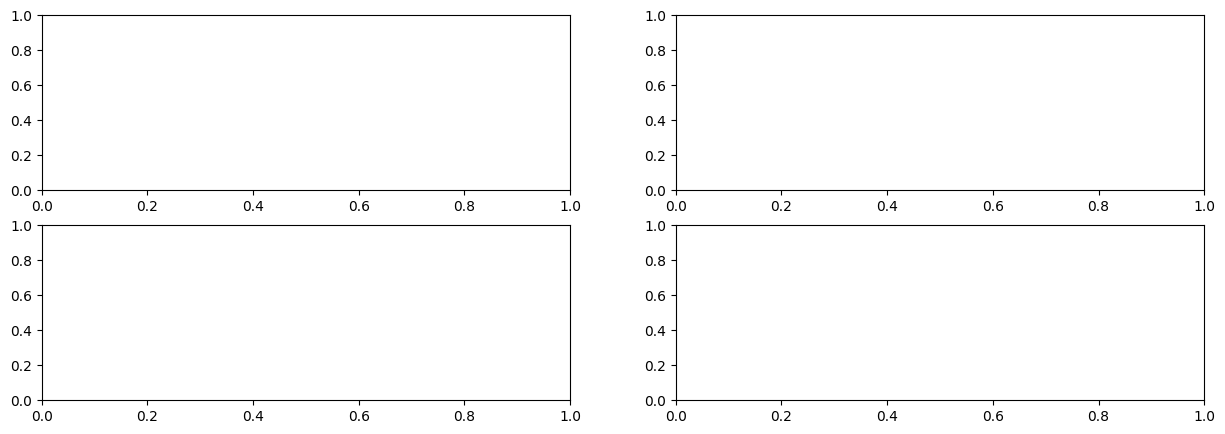

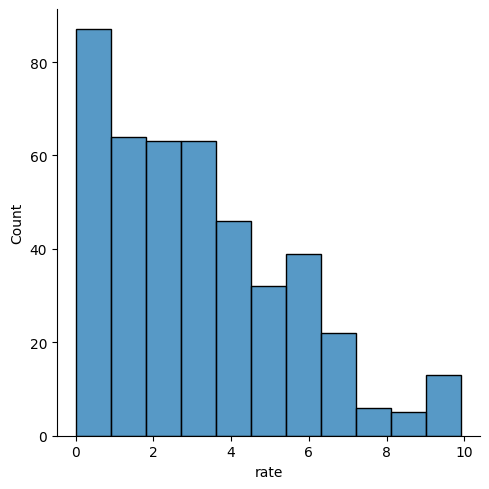

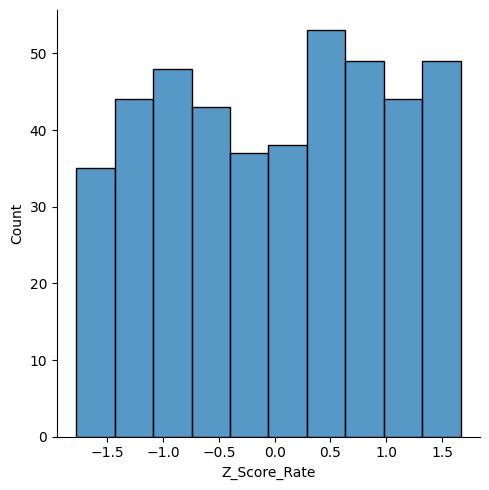

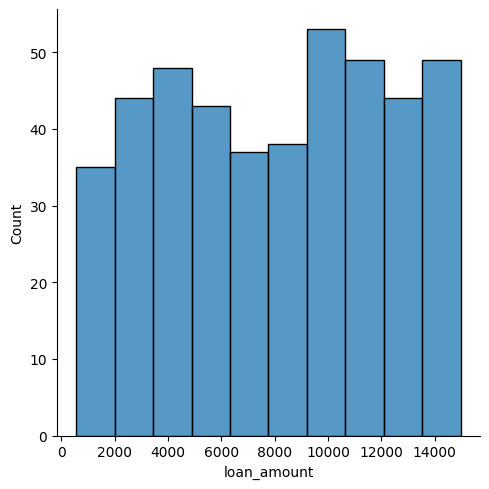

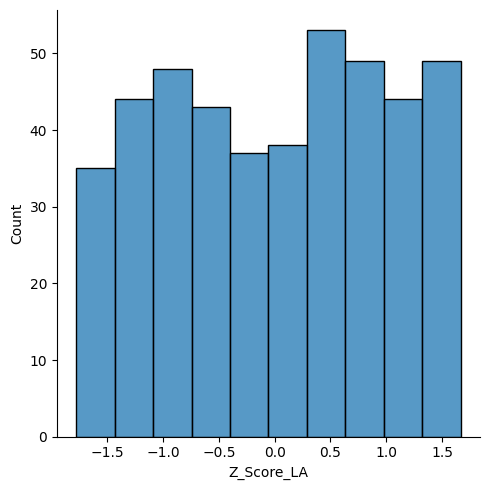

In [ ]:
fig, axes = plt.subplots(2,2, figsize=(15,5))

sns.displot(df3['rate'], ax=axes[0,0])
sns.displot(df3['Z_Score_Rate'], ax=axes[0,1])
sns.displot(df3['loan_amount'], ax=axes[1,0])
sns.displot(df3['Z_Score_LA'], ax=axes[1,1])

plt.show()

In [ ]:
df4 = df3.copy()
df4.drop(columns = ['Z_Score_Rate'], inplace=True)
df4.head()

,client_id,loan_type,loan_amount,repaid,loan_id,loan_start,loan_end,rate,Z_Score_LA
0,46109,home,13672,0,10243,2002-04-16,2003-12-20,2.15,1.357792
1,46109,credit,9794,0,10984,2003-10-21,2005-07-17,1.25,0.429916
2,46109,home,12734,1,10990,2006-02-01,2007-07-05,0.68,1.133360
3,46109,cash,12518,1,10596,2010-12-08,2013-05-05,1.24,1.081678
4,46109,credit,14049,1,11415,2010-07-07,2012-05-21,3.13,1.447996


In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
df4_num = df[['loan_amount','rate']]
df4_num.head()

,loan_amount,rate
client_id,,
46109,13672,2.15
46109,9794,1.25
46109,12734,0.68
46109,12518,1.24
46109,14049,3.13


In [ ]:
SS = StandardScaler()
scaled_x = SS.fit_transform(df4_num)
scaled_x

array([[ 1.36502962e+00, -4.45676908e-01],
       [ 4.34647423e-01, -8.21544457e-01],
       [ 1.13999132e+00, -1.05959390e+00],
       [ 1.08817014e+00, -8.25720763e-01],
       [ 1.45547678e+00, -3.63989115e-02],
       [-2.51263533e-01, -5.33379336e-01],
       [-4.33117505e-01,  2.61555546e+00],
       [ 1.12127812e+00,  3.85408004e-01],
       [ 7.38856969e-01,  9.45033020e-01],
       [-9.43412224e-01,  4.35523677e-01],
       [-1.52688038e+00,  1.36683993e+00],
       [ 1.01648330e-01, -1.13476741e+00],
       [ 2.57831622e-01, -9.84420394e-01],
       [-1.06960640e+00,  1.15384832e+00],
       [ 6.88715175e-01, -1.65864400e-01],
       [-1.54338725e-01, -8.04839232e-01],
       [ 9.52619355e-01,  3.45982920e-02],
       [ 5.00143642e-01, -4.05752176e-02],
       [ 9.66054477e-01, -1.01365454e+00],
       [-1.78094813e+00,  3.89584310e-01],
       [ 1.20620728e+00, -5.33379336e-01],
       [-9.91154890e-01, -1.00530192e+00],
       [ 1.04767198e-01, -9.96949312e-01],
       [ 9.

6b. Normalization: Min Max Scalar

In [ ]:
min_rate = df4.rate.min()
min_rate

0.01

In [ ]:
max_rate = df4.rate.max()
max_rate

9.91

In [ ]:
df4['Min_Max_R'] = (df4['rate'] - min_rate)/(max_rate - min_rate)

In [ ]:
print ("".format(df4.rate.skew()))
print ("".format(df3.Z_Score_Rate.skew()))
print ("".format(df4.Min_Max_R.skew()))
print("")
print (format(df4.rate.kurt()))
print (format(df3.Z_Score_Rate.kurt()))
print (format(df4.Min_Max_R.kurt()))





-0.05964248048746912
-1.2354309429278456
-0.05964248048746823


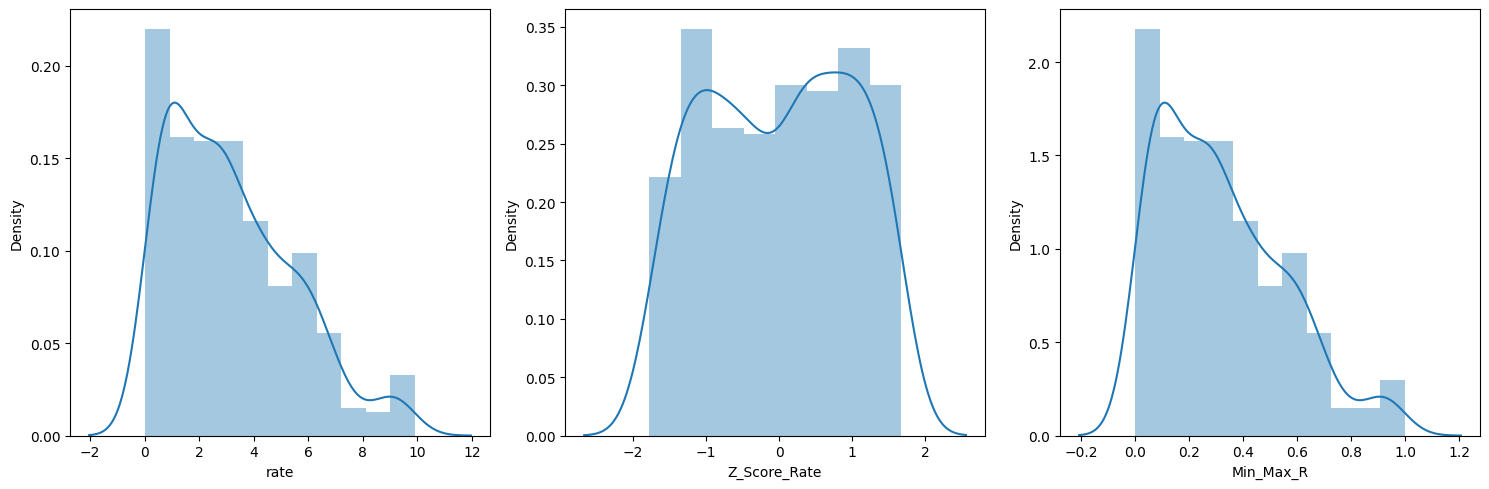

In [ ]:
fig, axes = plt.subplots(1,3, figsize=(15,5))

sns.distplot(df3['rate'], ax=axes[0])
sns.distplot(df3['Z_Score_Rate'], ax=axes[1])
sns.distplot(df4['Min_Max_R'], ax=axes[2])

plt.tight_layout()
plt.show()

In [ ]:
min_LA = df4.loan_amount.min()
min_LA

559

In [ ]:
max_LA = df4.loan_amount.max()
max_LA

14971

In [ ]:
df4['Min_Max_LA'] = (df4['loan_amount'] - min_LA)/(max_LA - min_LA)

In [ ]:
print ("".format(df4.loan_amount.skew()))
print ("".format(df3.Z_Score_LA.skew()))
print ("".format(df4.Min_Max_LA.skew()))
print("")
print (format(df4.loan_amount.kurt()))
print (format(df3.Z_Score_LA.kurt()))
print (format(df4.Min_Max_LA.kurt()))





-1.2354309429278456
-1.2354309429278456
-1.2354309429278452


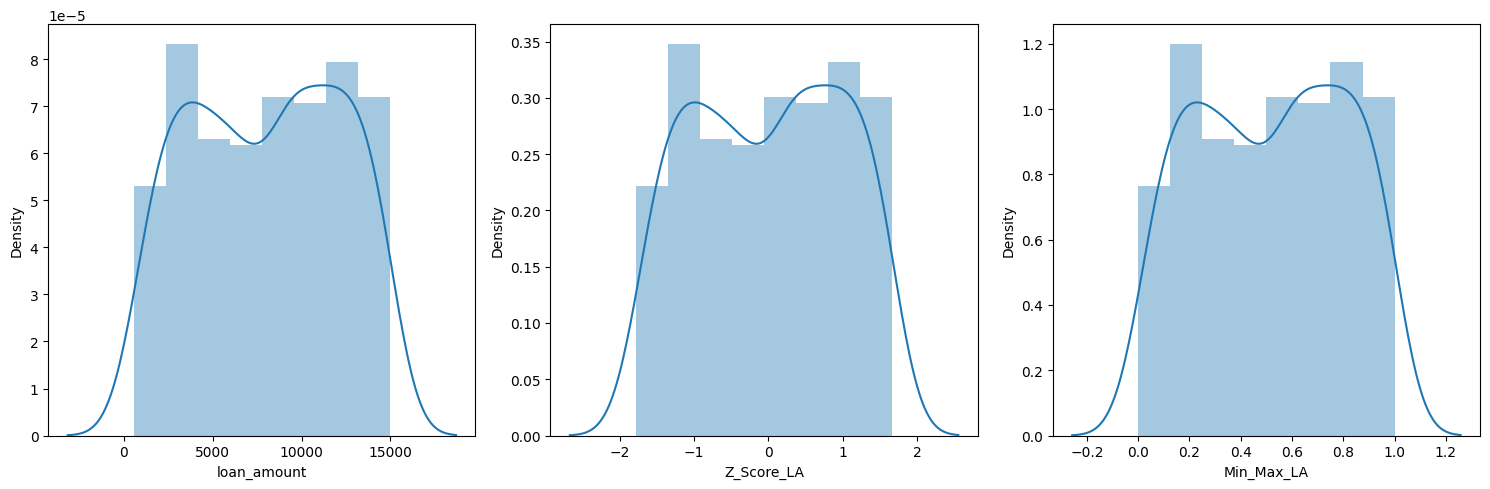

In [ ]:
fig, axes = plt.subplots(1,3, figsize=(15,5))

sns.distplot(df3['loan_amount'], ax=axes[0])
sns.distplot(df3['Z_Score_LA'], ax=axes[1])
sns.distplot(df4['Min_Max_LA'], ax=axes[2])

plt.tight_layout()
plt.show()

In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
MS = MinMaxScaler()

MinMaxScaled = MS.fit_transform(df4_num)
MinMaxScaled

array([[9.09866778e-01, 1.69706582e-01],
       [6.40785457e-01, 9.83346550e-02],
       [8.44782126e-01, 5.31324346e-02],
       [8.29794616e-01, 9.75416336e-02],
       [9.36025534e-01, 2.47422680e-01],
       [4.42409104e-01, 1.53053132e-01],
       [3.89814044e-01, 7.50991277e-01],
       [8.39369969e-01, 3.27517843e-01],
       [7.28767694e-01, 4.33782712e-01],
       [2.42228698e-01, 3.37034100e-01],
       [7.34804330e-02, 5.13877875e-01],
       [5.44476825e-01, 3.88580492e-02],
       [5.89647516e-01, 6.74068200e-02],
       [2.05731335e-01, 4.73433783e-01],
       [7.14265890e-01, 2.22839017e-01],
       [4.70441299e-01, 1.01506741e-01],
       [7.90591174e-01, 2.60904044e-01],
       [6.59728004e-01, 2.46629659e-01],
       [7.94476825e-01, 6.18556701e-02],
       [0.00000000e+00, 3.28310864e-01],
       [8.63932834e-01, 1.53053132e-01],
       [2.28420760e-01, 6.34417129e-02],
       [5.45378851e-01, 6.50277557e-02],
       [7.79905634e-01, 5.16256939e-01],
       [6.843602

In [ ]:
df_loans = df3.copy()

In [ ]:
df_loans.drop(columns = ['Z_Score_Rate'], inplace=True)
df_loans.drop(columns = ['Z_Score_LA'], inplace=True)

In [ ]:
df_loans.dtypes

client_id               int64
loan_type              object
loan_amount             int64
repaid               category
loan_id                 int64
loan_start     datetime64[ns]
loan_end       datetime64[ns]
rate                  float64
dtype: object

In [ ]:
df_loans.repaid.head()

0    0
1    0
2    1
3    1
4    1
Name: repaid, dtype: category
Categories (2, int64): [0, 1]

In [ ]:
dummy_cat = pd.get_dummies(df_loans['loan_type'], drop_first = True)
dummy_cat.head()

,credit,home,other
0,0,1,0
1,1,0,0
2,0,1,0
3,0,0,0
4,1,0,0
